<a href="https://colab.research.google.com/github/pierriccardo/DIA-project/blob/master/environment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment

## 1. a stochastic number of daily clicks of new users (i.e., that have never clicked before these ads) as a function depending on the bid

We assume that, by increasing the bid, we win more auctions and so we get more clicks. Since there is a great variability in this events, related both to the fact that we don't know how many auctions we win and how many people click on the add when they see it, we have to make a random function.

Indeed, we can take

$$N_c(bid)\sim \mathcal N(\mu(bid),\sigma(bid)^2)$$

Both $\mu$ and $\sigma$ should be non decreasing functions of the bid.
In particular,
- $\mu$ should go to zero when the bid is small, since we don't win any aution
- $\mu$ should go to a constant when the bid grows, since our potential customers are limited
- $\sigma$ should go to zero too when the bid is small, otherwise $$\mathcal N(\mu(bid),\sigma(bid)^2)$$ could be negative with non negligible probability


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import output

Defining the function $\mu$ we need to ensure two properties:
- $\mu$ should go to zero when the bid is small
- $\mu$ should go to a costan when the bid grows
Therefore we can model $\mu$ with a slightly modified logarithm function:
$$
\mu (bid) = \alpha (log(bid + 1)^{\frac{\alpha}{10}}) 
$$

Where $\alpha$ is a parameter defined a priori, based on our assumptions, that help to define a proper balance on clicks per bids. The higher $\alpha$ the higher the number of people we can reach. 

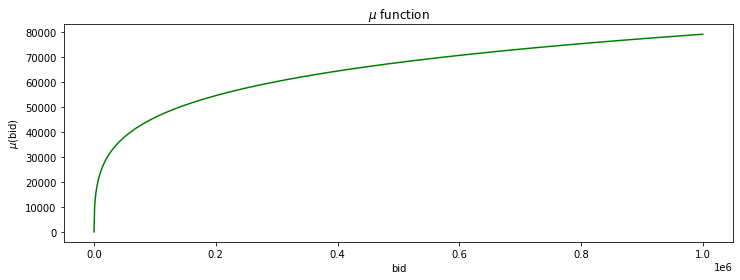

In [3]:
def mu_function(bid, alpha=30):
  return alpha * ( np.log(bid + 1) ** ( int(alpha/10) ) )


x = np.linspace(0,1000000,1000) #bid
y = mu_function(x)

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1, 1, 1)

plt.title('$\mu$ function')
plt.xlabel("bid")
plt.ylabel("$\mu$(bid)")

plt.plot(x,y, "g")
plt.show()

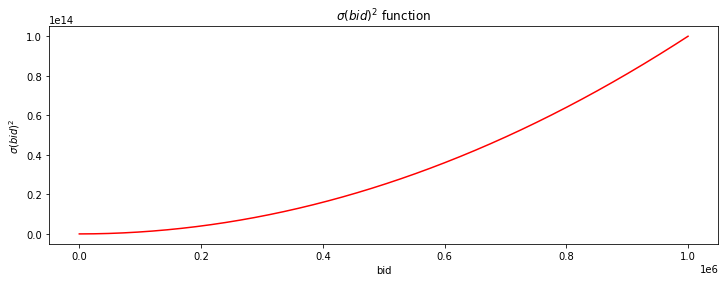

In [4]:
def sigma_function(bid, alpha=10):
  return bid * alpha

x = np.linspace(0,1000000,1000) #bid
y = sigma_function(x) ** 2

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1, 1, 1)

plt.title('$\sigma(bid)^{2}$ function')
plt.xlabel("bid")
plt.ylabel("$\sigma(bid)^{2}$")

plt.plot(x,y, "r")
plt.show()

Now we can define the number of clicks function using $\mu$ and $\sigma$ defined above, in a gaussian:
$$\mathcal N(\mu(bid),\sigma(bid)^2)$$

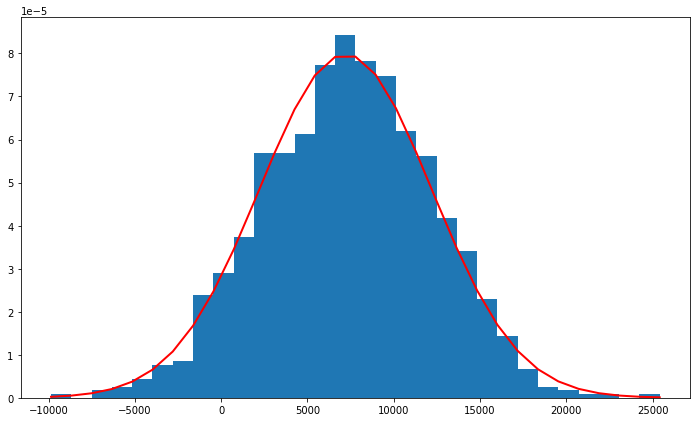

In [5]:
BID = 500
mu = mu_function(BID)
sigma = sigma_function(BID)

s = np.random.normal(mu, sigma, 1000)

fig = plt.figure(figsize=(12, 7))
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

## 2. a daily stochastic cost per click as a function of the bid

The dependence of the cost per click on the bid is due to the fact that given an auction, the winner pays an amount of money corresponding to the second price, not to its bid.

Of course, with a smaller bid it is much less likely to win the auction, however, we decided to assume that the bid is sufficient to win.

Defining $C_c:=$ cost per click, we'll take

$$C_c(bid)=bid*R\qquad R\sim Beta(a,b)$$

note that, since the beta distribution has support $[0,1]$, we cannot exceed the bid. To take into account the fact that with a small bid it is more likely that the second price is very close, we can take $a,b$ depending on the bid, for example, with
$$a=15\qquad b=bid$$
we would have
$$\mathbb E[R]=\frac{15}{15+bid}$$
so that,
$$\mathbb E[C_c]=\frac{15bid}{15+bid}$$

which goes to the bid when the bid is small and to $15$ when the bid is large.

In [6]:
a = 15
b = BID

def cost_per_click(bid, a=10):
  return bid * np.random.beta(a, bid, 1)[0]

print("examples")
for _ in range(0, 10):
  print(cost_per_click(BID))

examples
7.583826485975379
8.736526242141247
12.704067446776758
8.100977655896015
13.287243168429354
9.740518147560696
6.5962260128327435
7.886822226055953
14.51169910428536
9.54068374241781


## 3 Conversion rate function
We have to model the probability that a customer buys our product, once he sees it, as a function of the price.

Having three class of customers, we are defining three different conversion rate function. We take functions of the family

$$f(x)=x^a e^{-bx}$$

with three different couples of the parameters $(a,b)$. To chose this values, we have to take into account that
- the maximum of $f$ is taken for $x=\frac{a}{b}$, so we could adjust $\frac{a}{b}$ to be the most likely best price
    
- the maximum of $f$, $f(\frac{a}{b})=\frac{a^a}{b^a}e^{-a}$, can be more than one. In this case, we should divide the function by a constant $k$ such that the maximum remains in $[0,1]$
    
- For some products, the conversion rate function $f$ should be strictly decreasing. To have that, we should put $a=0$ 

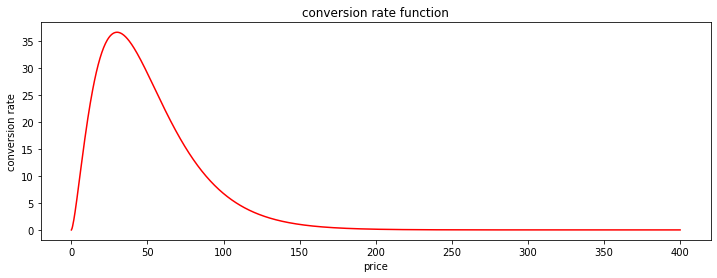

In [7]:
def conversion_rate(x, a, b):
  return (x**a) * np.exp(-b*x)

a = 1.5
b = .05

x = np.linspace(0,400,1000) 
y = conversion_rate(x, a, b)

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1, 1, 1)

plt.title('conversion rate function')
plt.xlabel("price")
plt.ylabel("conversion rate")

plt.plot(x,y, "r")
plt.show()

## 4 Probability distribution of the number of times the customer returns in the next $30$ days and again

We can define a different probability distribution on the number of returns in $30$ days for each class. If we assume that this quantity has always a Poisson distribution, we should choose three $\lambda$ values

$$\lambda_1,\lambda_2,\lambda_3$$

so that the times of return $X_i$ for the groups $i$ are

$$X_i\sim \mathcal P(\lambda_i)\qquad \mathbb P (X_i=k)=e^{-\lambda_i}\frac{\lambda_i^k}{k!}$$

To choose these three values, we have to think well about our product

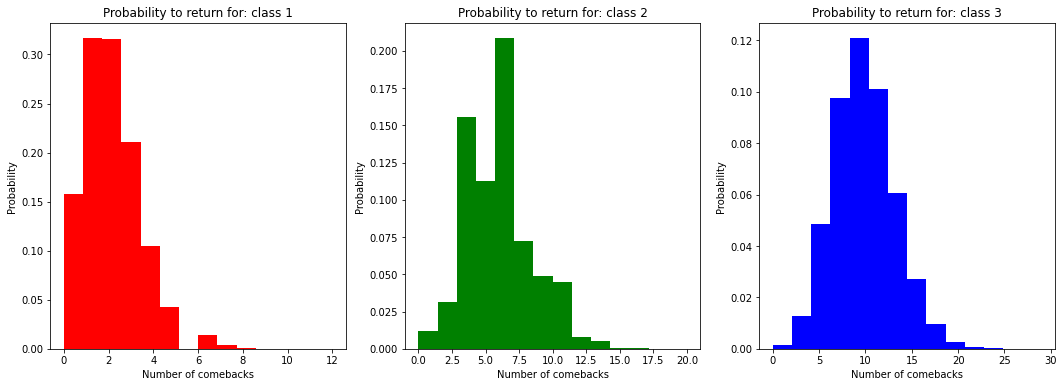

In [47]:
L1, L2, L3 = 2, 6, 10

class1 = np.random.poisson(L1, 1000000)
class2 = np.random.poisson(L2, 1000000)
class3 = np.random.poisson(L3, 1000000)

classes = [class1, class2, class3]
classes_labels = ["class 1", "class 2", "class 3"]
colors = ["r", "g", "b"]


fig, axs = plt.subplots(1,3, figsize=(18,6))
for i, c in enumerate(customers_classes_labels):
  axs[i].hist(classes[i], 14, density=True, color=colors[i])
  axs[i].set_title("Probability to return for: " + c)
  axs[i].set_xlabel("Number of comebacks")
  axs[i].set_ylabel("Probability")